In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [121]:
# загрузка данных
data = pd.read_csv('data.csv')
data.head(10)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
0,143822.0,22,104.12,130068.80,8,756.09,31,0,36,10000.0,10000,196,0.0,2017-07-23,0.0,728319,320464,1
1,0.0,0,38151.93,46230.00,1492,38151.93,51,0,93,10000.0,10000,17,20000.0,2017-07-23,0.0,728321,320466,1
2,51356.0,2,3000.00,3000.00,8,3000.00,28,1,3,10000.0,10000,84,0.0,2017-07-23,0.0,728323,320467,1
3,0.0,0,22784.19,32103.52,913,22784.19,28,0,52,10000.0,10000,7,0.0,2017-07-23,0.0,728447,320533,1
4,12298.0,1,4942.95,4950.00,2883,4942.95,31,0,47,5000.0,5000,20,0.0,2017-07-23,0.0,728421,298598,1
5,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
6,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
7,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
8,786916.0,11,0.00,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
9,0.0,0,21143.00,21143.00,1016,10924.00,28,1,0,10000.0,10000,90,0.0,2017-07-23,0.0,728454,123851,1


In [104]:
data.tail(10)

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
49991,0.00,0,0.00,3000.00,0,0.00,27,1,78,5000.0,5000,10,35000.0,2017-08-13,0.0,759729,274210,1
49992,15000.00,1,0.00,0.00,0,0.00,22,0,40,20000.0,1000,23,35000.0,2017-08-13,0.0,759735,66088,1
49993,96500.00,3,93600.00,95100.00,2281,93600.00,30,0,45,5000.0,5000,13,50000.0,2017-08-13,0.0,759736,338385,1
49994,96500.00,3,93600.00,95100.00,2281,93600.00,30,0,45,5000.0,5000,13,50000.0,2017-08-13,0.0,759736,338385,1
49995,0.00,0,26758.57,25000.00,371,26758.57,44,1,42,3000.0,1000,23,50000.0,2017-08-13,1545.0,759462,338231,0
49996,0.00,0,74662.61,79662.61,2593,42204.55,27,1,0,4000.0,4000,20,0.0,2017-08-13,0.0,759472,96091,1
49997,21653.49,2,0.00,0.00,0,0.00,28,0,75,2000.0,2000,10,20000.0,2017-08-13,0.0,759475,338240,1
49998,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
49999,0.00,0,0.00,1000.00,0,941.00,22,0,0,10000.0,10000,20,35000.0,2017-08-13,0.0,759485,338246,1
50000,19750.00,9,14100.00,14100.00,331,6000.00,33,0,40,2000.0,2000,21,0.0,2017-08-13,0.0,759490,261961,1


In [105]:
data.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income', 'order_date', 'cost_all',
       'order_id', 'client_id', 'expert'],
      dtype='object')

In [106]:
# для удобства создаю отдельные списки с именами столбцов
num_cols = ['closed_cred_sum',
            'closed_creds',
            'active_cred_sum_overdue',
            'active_cred_sum',
            'active_cred_day_overdue',
            'active_cred_max_overdue',
            'age',
            'gender',
            'region',
            'first_loan',
            'loan_cost_all',
            'first_days_quant',
            'month_income',
            'cost_all',
            'order_id',
            'client_id']

old_credit_cols = ['closed_cred_sum',
            'closed_creds',
            'active_cred_sum_overdue',
            'active_cred_sum',
            'active_cred_day_overdue',
            'active_cred_max_overdue']

new_credit_cols = ['first_loan',
            'loan_cost_all',
            'first_days_quant',
            'month_income',
            'cost_all',
            'order_id',
            'client_id']

cat_cols = 'order_date'
target = 'expert'

In [107]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          50001 non-null  float64
 1   closed_creds             50001 non-null  int64  
 2   active_cred_sum_overdue  50001 non-null  float64
 3   active_cred_sum          50001 non-null  float64
 4   active_cred_day_overdue  50001 non-null  int64  
 5   active_cred_max_overdue  50001 non-null  float64
 6   age                      50001 non-null  int64  
 7   gender                   50001 non-null  int64  
 8   region                   50001 non-null  int64  
 9   first_loan               49982 non-null  float64
 10  loan_cost_all            50001 non-null  int64  
 11  first_days_quant         50001 non-null  int64  
 12  month_income             50001 non-null  float64
 13  order_date               50001 non-null  object 
 14  cost_all              

In [122]:
# видно что в столбце first_loan, есть пропуски
# проверим насколько важны эти данные
data['first_loan'].isnull().value_counts()

False    49982
True        19
Name: first_loan, dtype: int64

In [123]:
print('Доля nan в столбце first_loan: {:.3f}% '.format(19 / 49982 * 100))
# доля значенией незначительна относительно всех данных, значит можно просто их удалить

Доля nan в столбце first_loan: 0.038% 


In [124]:
data.dropna(inplace=True)

In [125]:
# возможно, что данные по кредитной истории могут дублироваться, потому что получены из разных агенств
# проверим эту гипотезу и избавимся от повторов
data[data[old_credit_cols].duplicated()]

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,order_date,cost_all,order_id,client_id,expert
6,786916.0,11,0.0,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
7,786916.0,11,0.0,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
8,786916.0,11,0.0,1063763.00,0,10395.39,47,0,38,10000.0,5500,14,50000.0,2017-07-23,0.0,728526,320564,0
10,0.0,0,21143.0,21143.00,1016,10924.00,28,1,0,10000.0,10000,15,30000.0,2017-07-23,0.0,728553,123851,1
13,0.0,0,0.0,8000.00,0,0.00,24,1,80,7000.0,7000,10,35000.0,2017-07-23,0.0,728478,320544,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49989,1172775.9,128,13000.0,507120.81,23,13000.00,25,0,0,10000.0,5500,18,60000.0,2017-08-13,9291.7,759724,338381,0
49991,0.0,0,0.0,3000.00,0,0.00,27,1,78,5000.0,5000,10,35000.0,2017-08-13,0.0,759729,274210,1
49992,15000.0,1,0.0,0.00,0,0.00,22,0,40,20000.0,1000,23,35000.0,2017-08-13,0.0,759735,66088,1
49994,96500.0,3,93600.0,95100.00,2281,93600.00,30,0,45,5000.0,5000,13,50000.0,2017-08-13,0.0,759736,338385,1


In [126]:
data = data.drop_duplicates(subset=old_credit_cols, keep='first')
data.shape

(39889, 18)

In [127]:
# чистый датасет
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39889 entries, 0 to 50000
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   closed_cred_sum          39889 non-null  float64
 1   closed_creds             39889 non-null  int64  
 2   active_cred_sum_overdue  39889 non-null  float64
 3   active_cred_sum          39889 non-null  float64
 4   active_cred_day_overdue  39889 non-null  int64  
 5   active_cred_max_overdue  39889 non-null  float64
 6   age                      39889 non-null  int64  
 7   gender                   39889 non-null  int64  
 8   region                   39889 non-null  int64  
 9   first_loan               39889 non-null  float64
 10  loan_cost_all            39889 non-null  int64  
 11  first_days_quant         39889 non-null  int64  
 12  month_income             39889 non-null  float64
 13  order_date               39889 non-null  object 
 14  cost_all              

In [118]:
data.describe()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all,order_id,client_id,expert
count,3.988900e+04,39889.000000,3.988900e+04,3.988900e+04,39889.000000,3.988900e+04,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000,39889.000000
mean,1.901189e+05,8.246233,5.293742e+04,1.991539e+05,748.372358,3.870373e+04,35.135100,0.465241,28.625837,7774.185866,6687.297250,24.118429,25550.879353,1308.618276,731780.881922,285784.203590,0.742084
std,5.240782e+05,14.277590,2.555971e+05,4.348818e+05,1372.362651,1.749557e+05,11.276928,0.498797,29.757629,5453.519109,4675.644926,37.508541,20648.151331,4646.736970,25273.925420,76045.098497,0.437493
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,18.000000,0.000000,0.000000,2000.000000,100.000000,7.000000,0.000000,0.000000,695828.000000,109.000000,0.000000
25%,8.000000e+03,1.000000,0.000000e+00,1.706000e+04,0.000000,1.300000e+03,27.000000,0.000000,0.000000,5000.000000,3000.000000,10.000000,0.000000,0.000000,712726.000000,286406.000000,0.000000
50%,4.611100e+04,4.000000,6.000000e+03,6.100000e+04,95.000000,7.904050e+03,32.000000,0.000000,24.000000,7000.000000,7000.000000,20.000000,27000.000000,0.000000,730673.000000,313296.000000,1.000000
75%,1.786000e+05,10.000000,3.372950e+04,2.032431e+05,948.000000,2.577421e+04,41.000000,1.000000,52.000000,10000.000000,10000.000000,20.000000,35000.000000,0.000000,746618.000000,326765.000000,1.000000
max,4.457421e+07,563.000000,3.303100e+07,2.273166e+07,21927.000000,2.170166e+07,99.000000,1.000000,99.000000,100000.000000,100000.000000,336.000000,550000.000000,238770.420000,840692.000000,393528.000000,1.000000


In [130]:
# для удобства order_date переведем в формат datetime
data['order_date'] = pd.to_datetime(data['order_date'])

In [135]:
data.columns

Index(['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income', 'order_date', 'cost_all',
       'order_id', 'client_id', 'expert'],
      dtype='object')

### Визуализация и анализ

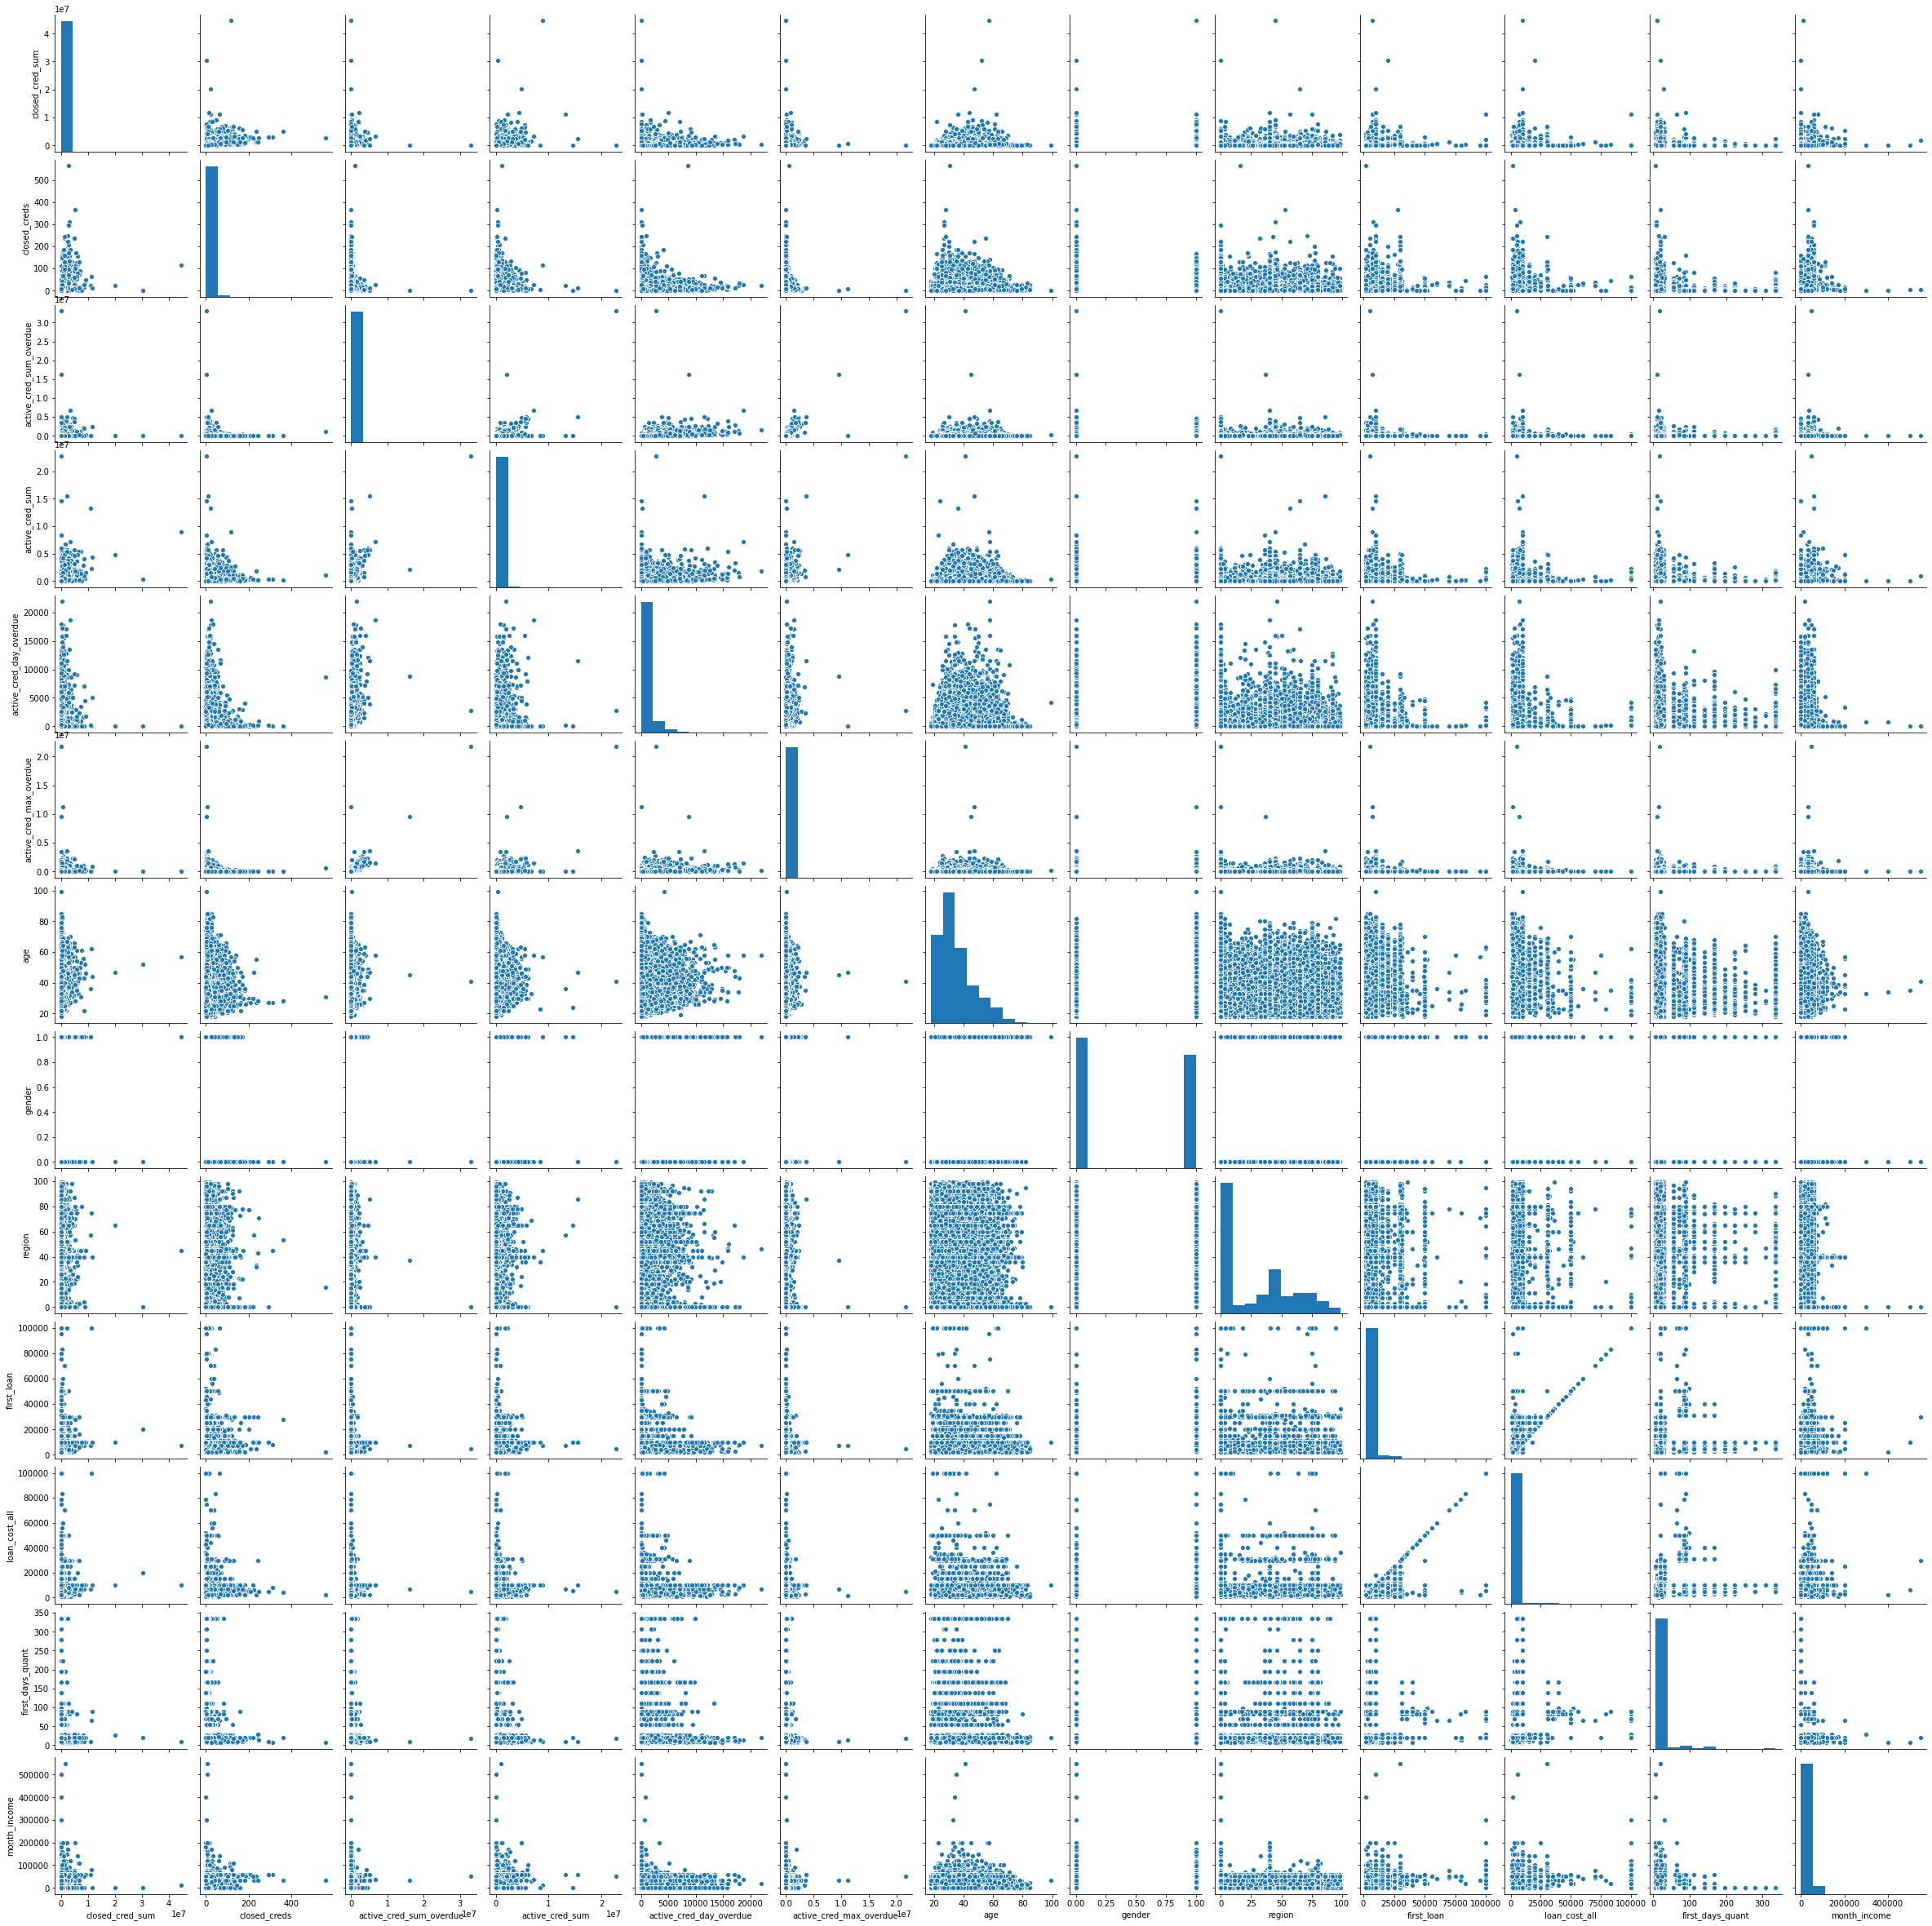

In [137]:
sns.pairplot(data[['closed_cred_sum', 'closed_creds', 'active_cred_sum_overdue',
       'active_cred_sum', 'active_cred_day_overdue', 'active_cred_max_overdue',
       'age', 'gender', 'region', 'first_loan', 'loan_cost_all',
       'first_days_quant', 'month_income']])

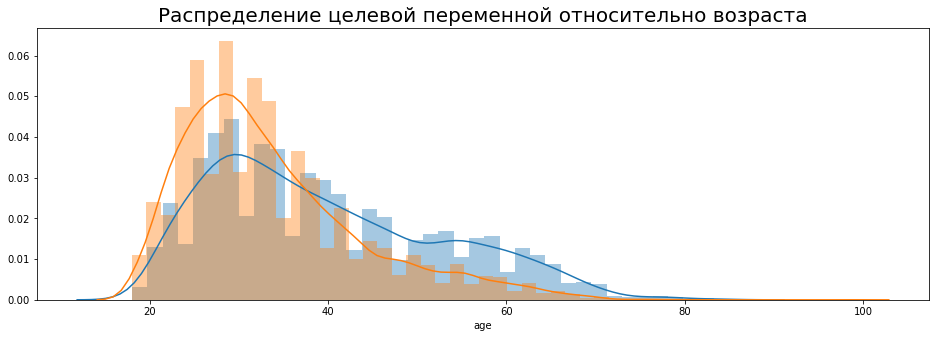

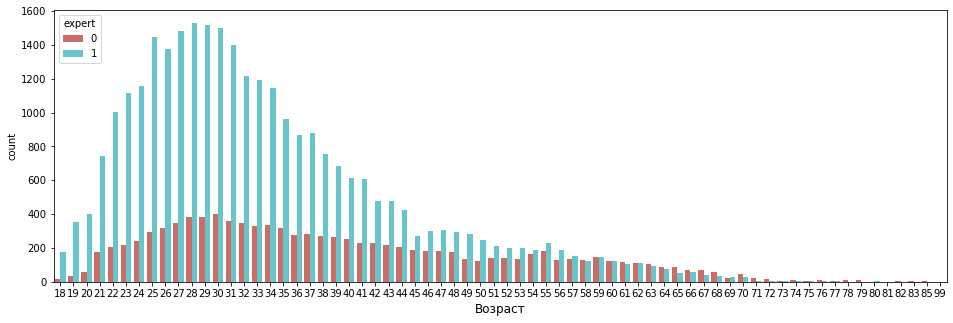

In [138]:
plt.figure(figsize=(16,5))
g0 = sns.distplot(data[data['expert'] == 0]['age'])
g0 = sns.distplot(data[data['expert'] == 1]['age'])
g0.set_title('Распределение целевой переменной относительно возраста', fontsize=20)
plt.show()

plt.figure(figsize=(16,5))
g = sns.countplot(x='age',
                  data=data,
                  palette='hls',
                  hue = 'expert')
g.set_xlabel('Возраст', fontsize=12)
plt.show()

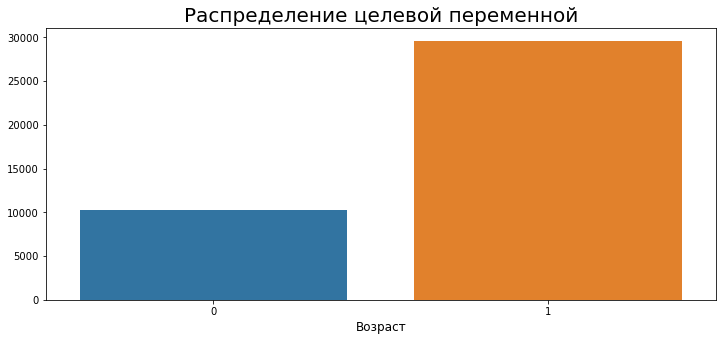

In [139]:
plt.figure(figsize=(12,5))
g = sns.barplot(x=data['expert'].value_counts().index,
               y=data['expert'].value_counts().values)
g.set_xlabel('Возраст', fontsize=12)
g.set_title('Распределение целевой переменной', fontsize=20)
plt.show()
# видно что целевой признак распределен неравномерно в данных
# положительных решений по кредиту значительно меньше (target(0))

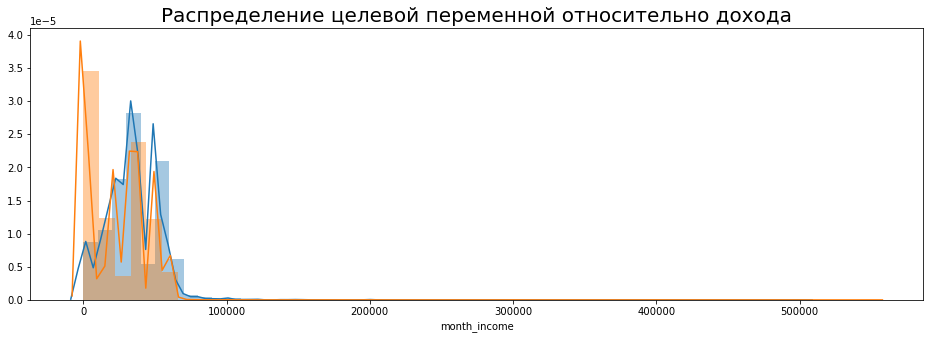

In [140]:
plt.figure(figsize=(16,5))
g0 = sns.distplot(data[data['expert'] == 0]['month_income'])
g0 = sns.distplot(data[data['expert'] == 1]['month_income'])
g0.set_title('Распределение целевой переменной относительно дохода', fontsize=20)
plt.show()

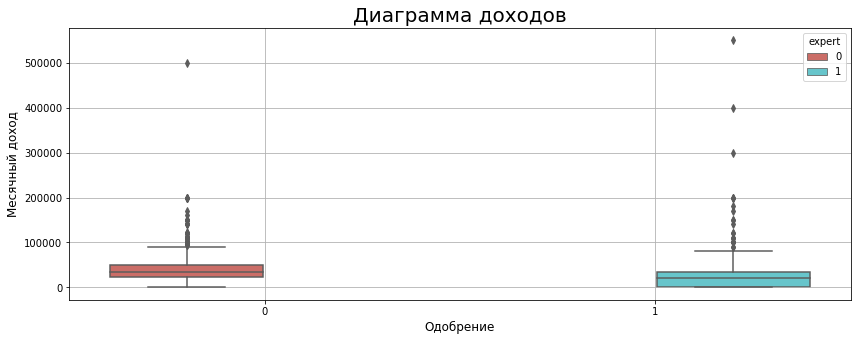

In [158]:
plt.figure(figsize=(14,5))
g = sns.boxplot(x='expert', y='month_income', data=data, 
               palette="hls", hue = 'expert')
g.set_xlabel('Одобрение', fontsize=12)
g.set_ylabel('Месячный доход', fontsize=12)
g.set_title('Диаграмма доходов', fontsize=20)
plt.grid()

In [160]:
# Из графика видно, что есть некоторые максимальные значения по доходу, которые могут влиять на точность модели.
# Поэтому я планирую использовать модели на основе решающих деревьев т.к. они хорошо работают с "выбросами" в данных.

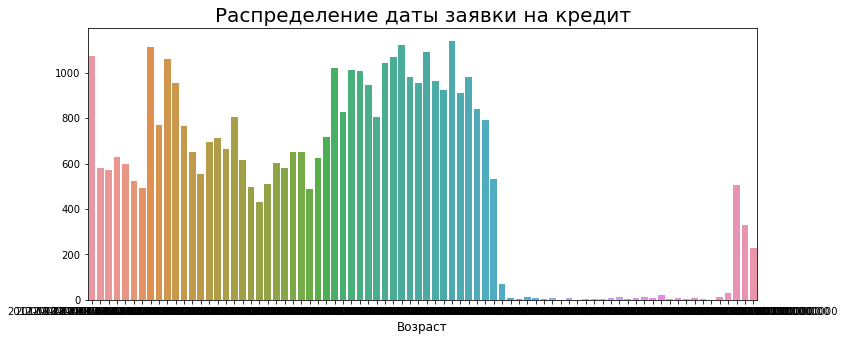

In [159]:
plt.figure(figsize=(12,5))
g = sns.barplot(x=data['order_date'].value_counts().index,
               y=data['order_date'].value_counts().values)
g.set_xlabel('Возраст', fontsize=12)
g.set_title('Распределение даты заявки на кредит', fontsize=20)
plt.show()

### Подготовка данных для обучения модели

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [212]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, classification_report

def all_scores(y_true, prediction, prediction_proba):
    '''
        Функция принимает списки с предсказанием
        и возвращает значение метрик ROC-AUC, F-мера, precision, recall.
    '''
    print(classification_report(y_true, prediction, target_names=['positive', 'negative']))
    print('ROC-AUC: ', roc_auc_score(y_true, prediction_proba[:,1]))
    print('f1: ', f1_score(y_true, y_pred))

In [164]:
X = data.copy()
y = data[target]

In [165]:
# Удалим целевую переменную из данных и id заявки и клиента т.к. 
# для предсказания это неинформативные данные. Используя их модель переобучится.
X.drop(columns=['order_id', 'client_id', 'expert'], inplace=True)

In [144]:
# создание новых временных признаков
# X['day'] = X['order_date'].apply(lambda x: x.day)
# X['week'] = X['order_date'].apply(lambda x: x.week)
# X['month'] = X['order_date'].apply(lambda x: x.month)

In [166]:
X.drop(columns=['order_date'], inplace=True)

In [167]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X_scaled = pd.DataFrame(data=scaled_data, columns=X.columns)

In [168]:
X_scaled.head()

,closed_cred_sum,closed_creds,active_cred_sum_overdue,active_cred_sum,active_cred_day_overdue,active_cred_max_overdue,age,gender,region,first_loan,loan_cost_all,first_days_quant,month_income,cost_all
0,-0.088341,0.963324,-0.206708,-0.158862,-0.539494,-0.216901,-0.366691,-0.932739,0.247811,0.408148,0.708511,4.582522,-1.237457,-0.281624
1,-0.362773,-0.577572,-0.057848,-0.351649,0.541866,-0.003154,1.406864,-0.932739,2.163310,0.408148,0.708511,-0.189784,-0.268835,-0.281624
2,-0.264778,-0.437491,-0.195378,-0.451057,-0.539494,-0.204076,-0.632725,1.072112,-0.861163,0.408148,0.708511,1.596498,-1.237457,-0.281624
3,-0.362773,-0.577572,-0.117973,-0.384133,0.119961,-0.090993,-0.632725,-0.932739,0.785495,0.408148,0.708511,-0.456393,-1.237457,-0.281624
4,-0.339306,-0.507531,-0.187776,-0.446573,1.555459,-0.192970,-0.366691,-0.932739,0.617468,-0.508703,-0.360874,-0.109801,-1.237457,-0.281624


In [169]:
X_scaled.shape, y.shape

((39889, 14), (39889,))

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

### Обучение моделей

In [172]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, f1_score
from sklearn.ensemble import RandomForestClassifier

In [173]:
# LogisticRegression

cls = LogisticRegression()
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
y_pred_proba = cls.predict_proba(X_test)

In [213]:
all_scores(y_test, y_pred, y_pred_proba)

              precision    recall  f1-score   support

    positive       0.99      0.97      0.98      2002
    negative       0.99      1.00      0.99      5976

    accuracy                           0.99      7978
   macro avg       0.99      0.98      0.99      7978
weighted avg       0.99      0.99      0.99      7978

ROC-AUC:  0.9959322805708348
f1:  0.993835388203932


In [180]:
# Попробуем использовать кросс-валидацию

cvs = cross_val_score(estimator=cls, 
                      X = X_train, y = y_train, 
                      scoring='roc_auc', 
                      cv=7, 
                      n_jobs=-1)


In [181]:
# Среднее значение ROC-AUC на кросс-валидации
cvs.mean()

0.9946837397835058

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [197]:
# RandomForest

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

In [214]:
all_scores(y_test, y_pred, y_pred_proba)

              precision    recall  f1-score   support

    positive       0.99      0.97      0.98      2002
    negative       0.99      1.00      0.99      5976

    accuracy                           0.99      7978
   macro avg       0.99      0.98      0.99      7978
weighted avg       0.99      0.99      0.99      7978

ROC-AUC:  0.9959322805708348
f1:  0.993835388203932


In [199]:
# Попробуем подобрать параметры для модели

params = {'n_estimators': [i for i in range(5, 100, 5)], 
          'random_state': [17, 42, 1]}

gs_result = GridSearchCV(estimator=model,
                         param_grid=params, 
                         cv=7, 
                         n_jobs=-1)

In [200]:
gs_result.fit(X_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90, 95],
                         'random_state': [17, 42, 1]})

In [201]:
gs_result.best_params_

{'n_estimators': 70, 'random_state': 17}

In [202]:
y_pred = gs_result.best_estimator_.predict(X_test)
y_pred_proba = gs_result.best_estimator_.predict_proba(X_test)

In [215]:
all_scores(y_test, y_pred, y_pred_proba)

              precision    recall  f1-score   support

    positive       0.99      0.97      0.98      2002
    negative       0.99      1.00      0.99      5976

    accuracy                           0.99      7978
   macro avg       0.99      0.98      0.99      7978
weighted avg       0.99      0.99      0.99      7978

ROC-AUC:  0.9959322805708348
f1:  0.993835388203932


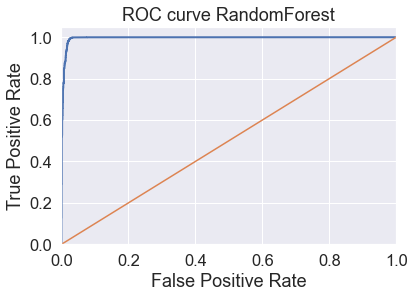

In [224]:
plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve RandomForest')
plt.show()

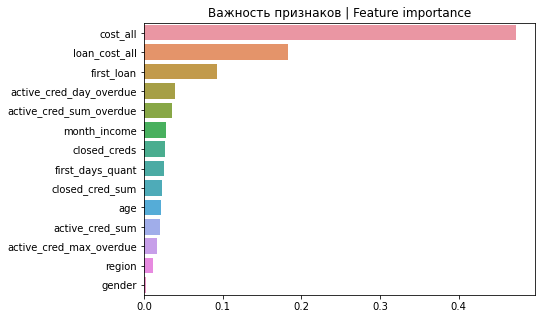

In [204]:
def plot_feature_importances(model, columns):
    
    '''
        Функция строит график важности признаков для предскания модели.
    '''
    
    # берем данные для графика
    # берем алгоритм с лучшими параметрами
    # по х мы берем важность признаков исходя из критерия Джини, 
    # сортируем их вместе с названиями колонок по возрастанию
    imp = pd.Series(data = model.best_estimator_.feature_importances_, 
                    index=columns).sort_values(ascending=False)

    plt.figure(figsize=(7,5))
    plt.title("Важность признаков | Feature importance")
    ax = sns.barplot(y=imp.index, x=imp.values, orient='h')


plot_feature_importances(gs_result, X_train.columns)

In [205]:
# XGBoost

from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [206]:
cls = XGBClassifier(random_state=42)
cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
y_pred_proba = cls.predict_proba(X_test)

c:\dev\miniconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:36:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [216]:
all_scores(y_test, y_pred, y_pred_proba)

              precision    recall  f1-score   support

    positive       0.99      0.97      0.98      2002
    negative       0.99      1.00      0.99      5976

    accuracy                           0.99      7978
   macro avg       0.99      0.98      0.99      7978
weighted avg       0.99      0.99      0.99      7978

ROC-AUC:  0.9959322805708348
f1:  0.993835388203932


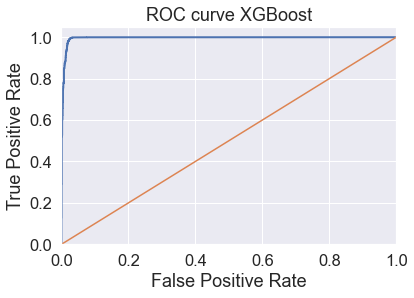

In [223]:
plt.figure(figsize=(6, 4))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1], pos_label=1)
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve XGBoost')
plt.show()

В данной задаче алгоритм Random Forest и XGBoost показали высокое значение метрики ROC-AUC. Из этого можно сделать вывод, что оба алгоритма достаточно четко классифицируют кому стоит одобрить кредит, а кому не стоит. XGBoost работает быстрее, при то же точности классификации, поэтому стоит использовать его, если стоит задача быстрого принятия решения.